<a href="https://colab.research.google.com/github/harshitasingh4839/Body_shamming_NLP/blob/main/Body_shamming_instagram_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA ACQUISITION**

In [1]:
# Importing the Dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/drive/MyDrive/Dataset/body_shaming_comments_labelled_dataset.csv')

df.sample(10)

,text,label
708,just lost 10 days holiday for taking four mont...,0
278,"Just like the lessons of previous years, boys ...",1
591,I didnï¿½t know I needed to take a popular vot...,1
711,"As a feminist woman, I still seem to have zero...",1
1862,Life is all about experiences and living outsi...,0
316,allsznrunner Before and after my easy in the N...,0
1604,saw this tweet by a bit ago and knew I had to ...,0
1395,newquotenewday#pinterest#loveit#stopbodyshamin...,0
1117,let your mind bully your body \n.\n.\n#blogger...,0
853,more tv ad everydaysexism sburysher fridge in ...,0


EXPLORATORY DATA ANALYSIS

1. Count of positive(0) and negative(1) comments in the dataset

In [3]:
df['label'].value_counts()

0    1423
1     736
Name: label, dtype: int64

2. Checking for Class Imbalance

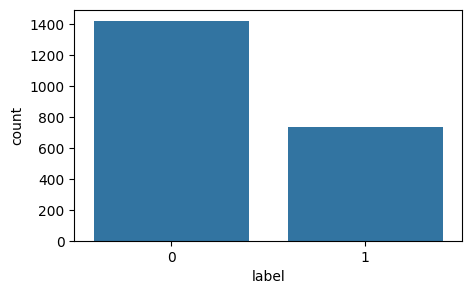

0    1423
1     736
Name: label, dtype: int64


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))

sns.countplot(x=df['label'])
plt.show()
print(df['label'].value_counts())

2. Checking the presence of Null value

In [5]:
df.isnull().sum()

text     0
label    0
dtype: int64

3. Checking the presence of duplicate records

In [6]:
df.duplicated().sum()

111

5. Visualization of Important Words from postitive sentiment

(-0.5, 1499.5, 799.5, -0.5)

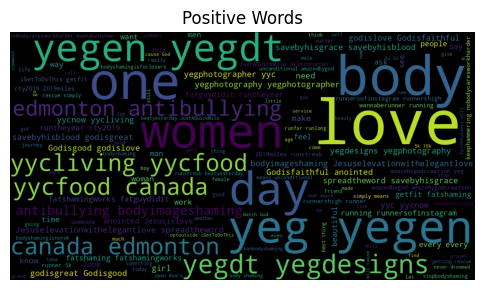

In [7]:
from wordcloud import WordCloud

sentences=df['text']
pos=' '.join(map(str,sentences[df['label']==0]))
neg=' '.join(map(str,sentences[df['label']==1]))

pos_wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='black',
                min_font_size = 15,max_font_size = 200).generate(pos)

plt.figure(figsize=(6,6))
plt.imshow(pos_wordcloud)
plt.title('Positive Words')
plt.axis('off')

6. Visualization of Important Words from negative sentiment

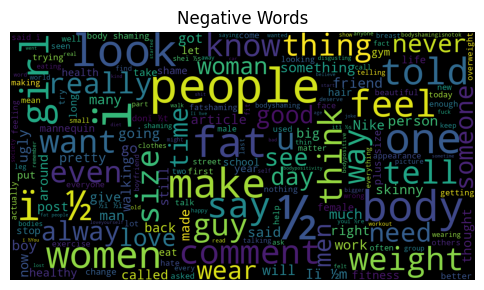

In [8]:
neg_wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='black',
                min_font_size = 15,max_font_size = 200).generate(neg)

plt.figure(figsize=(6,6))
plt.imshow(neg_wordcloud)
plt.title('Negative Words')
plt.axis('off')
plt.show()

7. Visulaization of number of character in comment

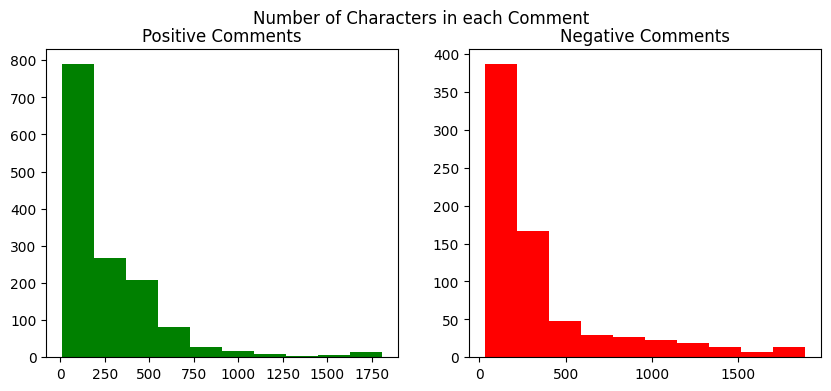

In [9]:
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(10,4))
len_pos_review=df[df['label']==0]['text'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Comments')
len_neg_review=df[df['label']==1]['text'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Comments')
figure.suptitle('Number of Characters in each Comment')
plt.show()

8. Visulaization of number of words in comments

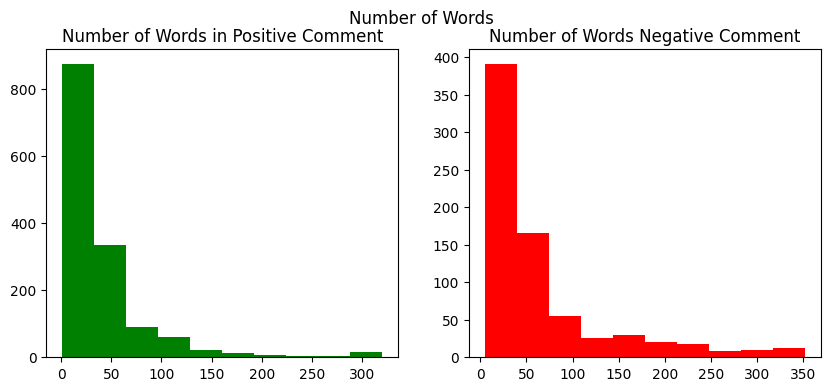

In [10]:
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(10,4))
pos_word=df[df['label']==0]['text'].str.split().map(lambda comment: len(comment))
pos_ax.hist(pos_word,color='green')
pos_ax.set_title('Number of Words in Positive Comment')
neg_word=df[df['label']==1]['text'].str.split().map(lambda comment: len(comment))
neg_ax.hist(neg_word,color='red')
neg_ax.set_title('Number of Words Negative Comment')
figure.suptitle('Number of Words')
plt.show()

9. Visulaize average of words in reviews

<ipython-input-11-5a1ba2a3545f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_word.map(lambda x: np.mean(x)),ax=pos_ax,color='green')
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
<ipython-input-11-5a1ba2a3545f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
h

Text(0.5, 0.98, 'Average word length in Comment')

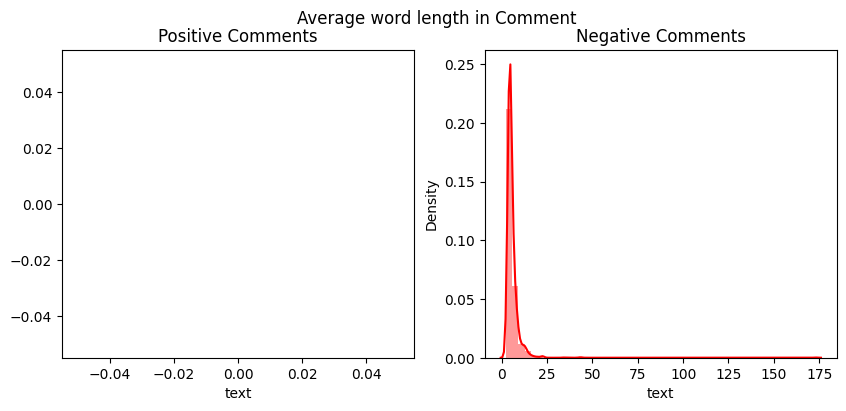

In [11]:


figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(10,4))
pos_word=df[df['label']>=7]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Positive Comments')
neg_word=df[df['label']<=4]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)),ax=neg_ax,color='red')
neg_ax.set_title('Negative Comments')
figure.suptitle('Average word length in Comment')

Removing duplicate records

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

10. Frequently occuring word in barchart for both positive and negative comments

<ipython-input-13-c0270c364eff>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_matrix.sum(axis=0).tolist()[0], y=pos_words, ax=axes[0], palette='viridis')
<ipython-input-13-c0270c364eff>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neg_matrix.sum(axis=0).tolist()[0], y=neg_words, ax=axes[1], palette='magma')


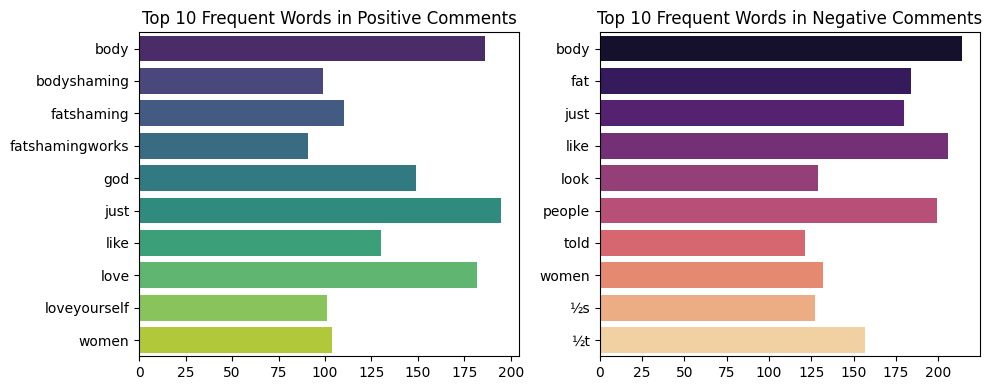

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

positive_comments = df[df['label'] ==0]['text']
negative_comments = df[df['label'] ==1]['text']

vectorizer_pos = CountVectorizer(stop_words='english', max_features=10)
pos_matrix = vectorizer_pos.fit_transform(positive_comments)
pos_words = vectorizer_pos.get_feature_names_out()

vectorizer_neg = CountVectorizer(stop_words='english', max_features=10)
neg_matrix = vectorizer_neg.fit_transform(negative_comments)
neg_words = vectorizer_neg.get_feature_names_out()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Positive Comments
sns.barplot(x=pos_matrix.sum(axis=0).tolist()[0], y=pos_words, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Frequent Words in Positive Comments')

# Negative Comments
sns.barplot(x=neg_matrix.sum(axis=0).tolist()[0], y=neg_words, ax=axes[1], palette='magma')
axes[1].set_title('Top 10 Frequent Words in Negative Comments')

plt.tight_layout()
plt.show()


**TEXT PREPROCESSING**

1. Removing unidentified encoded patterns

In [14]:
import re

def clean_comments(comment):
    # Remove unwanted non-ASCII characters using regular expression
    cleaned_comment = re.sub(r'[^\x00-\x7F]+', '', comment.encode('utf-8').decode('utf-8'))
    return cleaned_comment

df['text'] = df['text'].apply(clean_comments)

df.sample(10)


,text,label
1929,i was told by a male friend the other day that...,0
33,Sometimes a friend to lean a text an a sale a ...,0
29,Good Love your no matter who says If happy wit...,0
634,#loveyourself selflove proud respect selfcare ...,0
2062,be I think I was going to like this But differ...,1
2158,A boy thought it was funny to constantly tease...,1
1446,We heard a group of boys who we didnt know rat...,1
1528,My ten year old daughter wore her new glasses ...,1
1411,And the follow relive\n.\n.\n.\n.\n.\n.\n.\n#k...,0
1827,Tap water served with style,0


2. Spelling Checker

In [15]:
# !pip install swifter


In [16]:
# from textblob import TextBlob
# import swifter

# def correct_spelling(comment):
#     # Correcting the spelling using TextBlob
#     blob = TextBlob(comment)
#     corrected_comment = str(blob.correct())
#     return corrected_comment

# df['text'] = df['text'].swifter.apply(correct_spelling)
# df.sample(10)

3. Converting the sentence to lowercase

In [17]:
df['text'] = df['text'].str.lower()

df.sample(10)

,text,label
502,turning photo into photo steak and eggs is by ...,0
144,"in sixth grade, our physical health informatio...",1
1718,recommended a really nice woman to a male frie...,1
575,bodyshamingiswrong everysoulisbeautiful nabela...,0
1165,my skin broke out in an onslaught of pimples a...,1
7,i am 14 and through out my school year my butt...,0
1204,this is quite a few years not how i look but i...,0
1440,tell someone what they should or do to their 3...,0
1605,do they not think women might like hp,0
1568,i love my daisy duke so we do our best work pr...,0


4. Remove Punctuation

In [18]:
import string

df['text'] = df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation.replace('#', ''))))

df.sample(10)


,text,label
562,site argues that whores and feminazis need to ...,0
1,may you all have a peaceful tiredbuthappy deca...,0
45,got to let everything if you are unhappy with ...,0
1866,for the elderly widow whose late husbands frie...,0
1020,shaming \n\n#neverendingemotions bodyshaming q...,0
677,a man has been sentenced to almost four years ...,0
1690,this and i discuss our respective #magicwords ...,0
604,im not a dog i dont respond to whistling you j...,0
2016,wear a smile and kindness wherever you go you ...,0
1373,being told by a random woman on the streets th...,1


5. Removing Stop Words

In [19]:
import nltk
from nltk.corpus import stopwords

# Download NLTK stop words (if not already downloaded)
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

df.sample(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,label
1288,challenging word bitch slut told im top,0
1532,worst thing everyone arnold let show today boo...,0
803,new man started working office complained guys...,1
315,long run think today gonna try still feeling h...,0
1550,plus mean extra figure yes plus size,0
13,walking home college random male stranger thin...,1
620,tired focused #scarredqueen antibodyshaming ov...,0
324,precious girls could ever meet per questa mera...,0
110,service faithfulness cause god open doors neve...,0
731,body shaming realistic scenario done many ever...,0


6. Tokenization - Word Tokenization

In [20]:
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

# Assuming df is your DataFrame and 'text' is the column you want to tokenize
df['tokenized_text'] = df['text'].apply(word_tokenize)

df.sample(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text,label,tokenized_text
838,nolongerfriend always met someone new make fri...,0,"[nolongerfriend, always, met, someone, new, ma..."
1981,walking alone middle day along fairly busy hig...,1,"[walking, alone, middle, day, along, fairly, b..."
86,according women skip gym fear feeling insecure...,1,"[according, women, skip, gym, fear, feeling, i..."
1739,happen short hair 2mm buzz cut precise keep ge...,1,"[happen, short, hair, 2mm, buzz, cut, precise,..."
2135,someone said two days ago shut woman,0,"[someone, said, two, days, ago, shut, woman]"
1339,every assignment god given assignment got figh...,0,"[every, assignment, god, given, assignment, go..."
90,bruce forsyth interviewed daily mail 81212 sym...,1,"[bruce, forsyth, interviewed, daily, mail, 812..."
1758,feeling sick still gotta crank run streak day ...,0,"[feeling, sick, still, got, ta, crank, run, st..."
1132,facebook ads get sent losing weight diets make...,1,"[facebook, ads, get, sent, losing, weight, die..."
1602,katie price visiting husbands uni getting fema...,1,"[katie, price, visiting, husbands, uni, gettin..."


7. Stemming

In [21]:
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

df['stemmed_text'] = df['tokenized_text'].apply(lambda tokens: ' '.join([porter_stemmer.stem(token) for token in tokens]))

df.sample(10)

,text,label,tokenized_text,stemmed_text
1343,society made women feel need look certain way ...,0,"[society, made, women, feel, need, look, certa...",societi made women feel need look certain way ...
520,ok comment shape focus rosie x projectfitfitne...,0,"[ok, comment, shape, focus, rosie, x, projectf...",ok comment shape focu rosi x projectfitfitness...
204,might immediately think getting top finances t...,0,"[might, immediately, think, getting, top, fina...",might immedi think get top financ think make m...
645,man walked past street exclaimed jugs v v v loud,0,"[man, walked, past, street, exclaimed, jugs, v...",man walk past street exclaim jug v v v loud
24,male boss female manager read book recommended...,0,"[male, boss, female, manager, read, book, reco...",male boss femal manag read book recommend prob...
540,theres advert currently tv suitcases air hoste...,1,"[theres, advert, currently, tv, suitcases, air...",there advert current tv suitcas air hostess as...
1905,new blog post coming week open letter young bo...,0,"[new, blog, post, coming, week, open, letter, ...",new blog post come week open letter young body...
262,go fatshamingworks fatshamingsucks fatshamingw...,0,"[go, fatshamingworks, fatshamingsucks, fatsham...",go fatshamingwork fatshamingsuck fatshamingwee...
399,im doctor training room patient examining some...,0,"[im, doctor, training, room, patient, examinin...",im doctor train room patient examin someth wro...
1927,strive like girl something learned since follo...,1,"[strive, like, girl, something, learned, since...",strive like girl someth learn sinc follow ok w...


In [22]:
# Removing the tokenized_text column from the dataframe
df.drop('tokenized_text', axis=1, inplace=True)
df.sample(10)

,text,label,stemmed_text
1856,forget fall love carrie show free consultation...,0,forget fall love carri show free consult get p...
1965,2 men street discussing body nice arse shame r...,1,2 men street discuss bodi nice ars shame rest ...
226,close february miles february year total far f...,0,close februari mile februari year total far fe...
1108,incompetent men less experience promoted work,0,incompet men less experi promot work
1974,stopped reading creatively funny memes posted ...,1,stop read creativ funni meme post 9gag through...
1453,im 18 work uniform 5 minutes later beeped,0,im 18 work uniform 5 minut later beep
1446,heard group boys didnt know rating us appearan...,1,heard group boy didnt know rate us appear walk...
120,always wanted refused anyone else bullies like...,0,alway want refus anyon els bulli like version ...
1507,dont post much rest assured carnivore journey ...,0,dont post much rest assur carnivor journey may...
108,iv made mistake doubt self worth iv come reali...,0,iv made mistak doubt self worth iv come realiz...


PERFORMING TRAIN TEST SPLIT

In [23]:
X = df.stemmed_text
y = df.label

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
X_train=X_train.tolist()
y_train=y_train.tolist()
X_test=X_test.tolist()
y_test=y_test.tolist()

FEATURE ENGINEERING - FEATURE EXTRACTION FROM TEXT

1. Using n-grams

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(ngram_range=(1,6))
train_x_t = count_vec.fit_transform(X_train)
testx_t=count_vec.transform(X_test)

In [27]:
#vocabulary length
print(len(count_vec.vocabulary_))

159877


MODEL TRAINING

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

Random_Forest = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')
Random_Forest.fit(train_x_t,y_train)
pred=Random_Forest.predict(testx_t)
print("Accuracy Score: ",accuracy_score(pred,y_test)*100)
print("F1 Score: ",f1_score(pred,y_test, average="weighted")*100)
print("Precision: ",precision_score(pred, y_test, average="weighted")*100)


Accuracy Score:  80.97560975609757
F1 Score:  82.99537327925972
Precision:  89.37990674870778


EVALUATION

In [31]:
# !pip install --upgrade scikit-learn


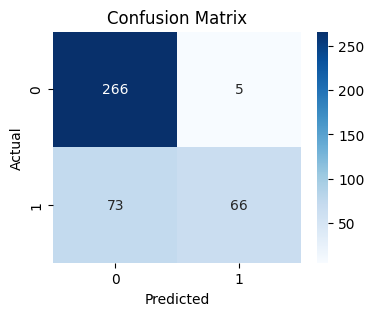

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       271
           1       0.93      0.47      0.63       139

    accuracy                           0.81       410
   macro avg       0.86      0.73      0.75       410
weighted avg       0.83      0.81      0.79       410



In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions
y_pred = Random_Forest.predict(testx_t)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.show()

# Print classification report
print(classification_report(y_test, y_pred))